## 1.3 Python. Numpy & Pandas section

### 1.3.1 What is Numpy and how to create basic 1-d and 2-d arrays? 
- NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices)

In [1]:
import numpy as np 

one_d = np.array([1, 2, 3])
two_d = np.array([[1, 2, 3], [3, 2, 1]])
print(one_d)
print(two_d)

[1 2 3]
[[1 2 3]
 [3 2 1]]


### 1.3.1 How to initialise NumPy array 5*5 with all zeros? 

In [2]:
all_zeros = np.zeros([5, 5])
all_zeros

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

### 1.3.2 How to add two arrays: [1, 2, 3]+ [1, 2, 3] = [2, 4, 6] ? 

In [3]:
array_one = np.array([1, 2, 3])
array_two = np.array([1, 2, 3])
new = array_one + array_two

# or 

np.sum((array_one, array_two), axis=0)

array([2, 4, 6])

### 1.3.3 How to get N largest values from the array?

In [4]:
arr = np.array([1, 4, 5, 3, 7, 5, 12, 5, 7, 176])
arr[np.argsort(arr)[-2::][::-1]] # return indexes of sorted array

array([176,  12])

### 1.3.4 Dataframe from list and dictionary:

In [5]:
import pandas as pd 

lst = [1, 3, 'word', 341]
dct = {1: 'word', 2: 'wind', 3: ['list', 'of', 'words']}

lst_df = pd.DataFrame(lst)
dct_df = pd.DataFrame(dct)
dct_df

,1,2,3
0,word,wind,list
1,word,wind,of
2,word,wind,words


### 1.3.5 Extract only records where df.some_col is less than N and more than M:

In [6]:
iris = pd.read_csv('iris.csv')

iris[(iris.sepal_width > 3) & (iris.sepal_length>5)].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa


### 1.3.6 Add Nan values to the first 10 rows in petal_length and petal_width columns:

In [7]:
iris1 = iris

iris.iloc[:10, [2, 3]] = np.NAN

In [8]:
iris1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,NaN,NaN,Iris-setosa
1,4.9,3.0,NaN,NaN,Iris-setosa
2,4.7,3.2,NaN,NaN,Iris-setosa
3,4.6,3.1,NaN,NaN,Iris-setosa
4,5.0,3.6,NaN,NaN,Iris-setosa


### 1.3.7 get number of Nan values in each column?

In [9]:
iris.isnull().sum()

sepal_length     0
sepal_width      0
petal_length    10
petal_width     10
species          0
dtype: int64

### 1.3.7.2 Drop rows with Null vals?

In [10]:
iris.dropna(inplace=True)
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### 1.3.8 Replace odd numbers in NumPy array with -1:

In [11]:
arr = np.array([1, 2, 3, 3, 4, 5, 6, 8, 10])

arr[arr%2==1] = -1
arr

array([-1,  2, -1, -1,  4, -1,  6,  8, 10])

### 1.3.9 Get common between 2 np arrays:

In [12]:
arr1 = np.array([1, 2, 3, 3, 4, 5, 6, 8, 10])
arr2 = np.array([1, 2, 0, 0, 0, 10, 0, 0, 0])

np.intersect1d(arr1, arr2)

array([ 1,  2, 10])

### 1.3.10 Convert first element of pandas series to uppercase:

In [13]:
scecies = pd.Series(iris.species.unique())

scecies.map(lambda x: x.title() )

0        Iris-Setosa
1    Iris-Versicolor
2     Iris-Virginica
dtype: object

### 1.3.11 Import only specific cols from .csv:

In [14]:
iris_spec_cols = pd.read_csv('iris.csv', usecols=['petal_width', 'species'], nrows=5) # or usecols=[3, 4]
iris_spec_cols

,petal_width,species
0,0.2,Iris-setosa
1,0.2,Iris-setosa
2,0.2,Iris-setosa
3,0.2,Iris-setosa
4,0.2,Iris-setosa


### 1.3.12 Row iterations in DF:

In [15]:
for index, row in iris_spec_cols.iterrows():
    print(index, row.petal_width, row.species)

0 0.2 Iris-setosa
1 0.2 Iris-setosa
2 0.2 Iris-setosa
3 0.2 Iris-setosa
4 0.2 Iris-setosa


### 1.3.11 Count word_len in each word in series:

In [16]:
scecies = scecies.map(len)
scecies

0    11
1    15
2    14
dtype: int64

### 1.3.12 Change column name in daraframe:

In [17]:
iris = pd.read_csv('iris.csv')
iris = iris.rename(columns={"petal_width": "other"})

### 1.3.13 Drop non-numeric column in DF:

In [18]:
iris = iris[iris.select_dtypes(include=np.number).columns]
iris

,sepal_length,sepal_width,petal_length,other
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 1.3.14 Drop column in DF:

In [19]:
# axis 1 = columns, inplace=True - drop without reassign
iris.drop(columns=['sepal_length', 'sepal_width'], axis=1, inplace=True)
iris

,petal_length,other
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


### 1.3.15 Filter column in DF:

In [159]:
iris = pd.read_csv('iris.csv')

iris[iris.petal_length > iris.petal_length.mean()]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 1.3.16 max/min in NumPy:

- ndarray.max() - max from all table 
- ndarray.max(axis=1) - max from each row
- ndarray.max(axis=0) - max from each column

### 1.3.17 NumPy read from file:
use  np.genfromtxt function 
- taxi = np.genfromtxt('file.csv', delimiter=',', skip_header=True)

In [21]:
ones = np.array([[1, 1, 1, 1, 1],
                 [1, 1, 1, 1, 1],
                 [1, 1, 1, 1, 1]])

ones[:, 0] = 42
print(ones)

[[42  1  1  1  1]
 [42  1  1  1  1]
 [42  1  1  1  1]]


### 1.3.18 Use map() method in Pandas:

we use it with dict:


- mapping_dict = {
    'Android': 'Android',
    'Mac OS': 'macOS',
    'macOS': 'macOS'}
    
- laptops['os'] = laptops['os'].map(mapping_dict)

at the end we get only 'macOS' values insteed 'macOS' and 'Mac OS'. If a value from your series doesn't exist as a key in your dictionary, it will convert that value to NaN.

### 1.3.18 Use agg, groupby in Pandas:

In [22]:
species = iris.groupby('species')['sepal_length'].agg([np.mean, np.max])
species

,mean,amax
species,,
Iris-setosa,5.006,5.8
Iris-versicolor,5.936,7.0
Iris-virginica,6.588,7.9


In [50]:
# or we can use pivot_table()

column_func = {'sepal_length': [np.mean, np.max], 'sepal_width': [np.mean, np.min]}

species_sepal_params = iris.pivot_table(values=['sepal_length', 'sepal_width'], index='species', aggfunc=column_func, margins=False)
species_sepal_params

sepal_length        sepal_width       
                        amax   mean        amin   mean
species                                               
Iris-setosa              5.8  5.006         2.3  3.418
Iris-versicolor          7.0  5.936         2.0  2.770
Iris-virginica           7.9  6.588         2.2  2.974

<AxesSubplot:title={'center':'Mean Sepal Parameters by Species'}, xlabel='species'>

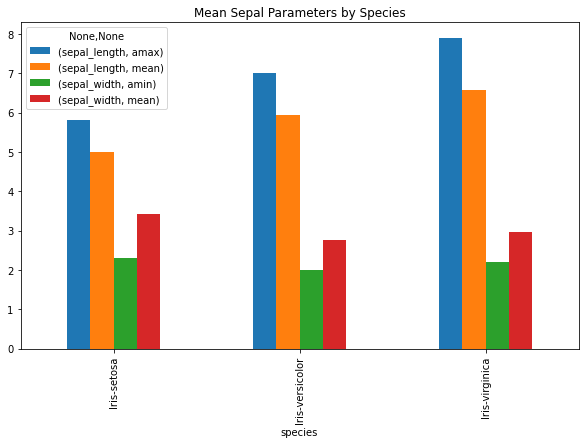

In [48]:
species_sepal_params.plot.bar( figsize=(10, 6), title='Mean Sepal Parameters by Species')
ax.tick_params(bottom=False, left=False, top=False, colors='grey') # add top!!!
for location in ['left', 'right', 'bottom', 'top']:  # delete all spines 
    ax.spines[location].set_visible(False)

### 1.3.19 WOrk with more than 1 dataset in Pandas:

In [139]:
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")
happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

In [55]:
# we can use pd.concat() function to glue DFs:

head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
concat_with_index = pd.concat([head_2015, head_2016])
concat_with_index

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
0,2016,Denmark,7.526,NaN
1,2016,Switzerland,7.509,NaN
2,2016,Iceland,7.501,NaN


In [56]:
# or we can set new index:

concat_update_index = pd.concat([head_2015, head_2016],ignore_index=True)
concat_update_index

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
4,2016,Denmark,7.526,NaN
5,2016,Switzerland,7.509,NaN
6,2016,Iceland,7.501,NaN


In [58]:
# we can use pd.merge() that can execute high performance database-style joins:

three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged = pd.merge(three_2015, three_2016, on='Country')
merged

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


In [63]:
# join by country:

essential_2015 = happiness2015[['Country','Happiness Score']]
essential_2016 = happiness2016[['Country','Happiness Score']]

merged = pd.merge(essential_2015, essential_2016, on='Country', suffixes=('_2015', '_2016'))
merged

,Country,Happiness Score_2015,Happiness Score_2016
0,Switzerland,7.587,7.509
1,Iceland,7.561,7.501
2,Denmark,7.527,7.526
3,Norway,7.522,7.498
4,Canada,7.427,7.404
...,...,...,...
146,Rwanda,3.465,3.515
147,Benin,3.340,3.484
148,Syria,3.006,3.069
149,Burundi,2.905,2.905


In [65]:
# join by index:

merged = pd.merge(essential_2015, essential_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'), how='left')
merged.head(10)

,Country_2015,Happiness Score_2015,Country_2016,Happiness Score_2016
0,Switzerland,7.587,Denmark,7.526
1,Iceland,7.561,Switzerland,7.509
2,Denmark,7.527,Iceland,7.501
3,Norway,7.522,Norway,7.498
4,Canada,7.427,Finland,7.413
5,Finland,7.406,Canada,7.404
6,Netherlands,7.378,Netherlands,7.339
7,Sweden,7.364,New Zealand,7.334
8,New Zealand,7.286,Australia,7.313
9,Australia,7.284,Sweden,7.291


### 1.3.20 transforming data in Pandas:

In [67]:
mapping = {'Economy (GDP per Capita)': 'Economy',
           'Health (Life Expectancy)': 'Health',
           'Trust (Government Corruption)': 'Trust' }

happiness2015 = happiness2015.rename(mapping, axis=1)
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [75]:
# we can use map&apply functions:

def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
    
economy_impact_map = happiness2015['Economy'].map(label)
economy_impact_apply = happiness2015['Economy'].apply(label)

economy_impact_map.equals(economy_impact_apply)

True

In [82]:
# in case of apply method, we can add additional args to funk :


def label(element, x=1):
    if element > x:
        return 'High'
    else:
        return 'Low'

economy_impact_apply = happiness2015['Economy'].apply(label, x=0.8)
economy_impact_apply.head()

0    High
1    High
2    High
3    High
4    High
Name: Economy, dtype: object

In [81]:
try:
    economy_impact_apply = happiness2015['Economy'].map(label, x=0.8)
except TypeError:
    print("map() got an unexpected keyword argument 'x'")

map() got an unexpected keyword argument 'x'


In [83]:
# pandas has a method that can apply functions to multiple columns at once - the DataFrame.applymap():

factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
factors_impact = happiness2015[factors].applymap(label)
factors_impact.head()

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low


In [86]:
# pd.melt() is an analog of pivot

main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health']
melt = pd.melt(happiness2015, id_vars=main_cols, value_vars=factors)
melt

,Country,Region,Happiness Rank,Happiness Score,variable,value
0,Switzerland,Western Europe,1,7.587,Economy,1.39651
1,Iceland,Western Europe,2,7.561,Economy,1.30232
2,Denmark,Western Europe,3,7.527,Economy,1.32548
3,Norway,Western Europe,4,7.522,Economy,1.45900
4,Canada,North America,5,7.427,Economy,1.32629
...,...,...,...,...,...,...
469,Rwanda,Sub-Saharan Africa,154,3.465,Health,0.42864
470,Benin,Sub-Saharan Africa,155,3.340,Health,0.31910
471,Syria,Middle East and Northern Africa,156,3.006,Health,0.72193
472,Burundi,Sub-Saharan Africa,157,2.905,Health,0.22396


### 1.3.21 Working with Strings In Pandas:

In [103]:
world_dev = pd.read_csv("World_dev.csv")
world_dev['Currency Vectorized'] = world_dev['CurrencyUnit'].str.split().str.get(-1)
world_dev[['ShortName', 'Currency Vectorized']].head()

,ShortName,Currency Vectorized
0,Afghanistan,afghani
1,Albania,lek
2,Algeria,dinar
3,American Samoa,dollar
4,Andorra,Euro


In [111]:
lengths_apply = merged['CurrencyUnit'].apply(lambda x: len(str(x))).value_counts()
lengths_apply

14    21
4     20
12    17
13    14
3     13
15    13
16    12
17     9
18     9
11     8
22     7
25     5
19     3
9      2
10     1
20     1
23     1
26     1
39     1
Name: CurrencyUnit, dtype: int64

In [133]:
pattern = r'[Dd]ollar'

dollar_cntrs = world_dev[world_dev['Currency Vectorized'].str.contains(pattern, na=False)]
dollar_cntrs.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Vectorized
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN,dollar
6,ATG,Antigua and Barbuda,Antigua and Barbuda,Antigua and Barbuda,AG,East Caribbean dollar,April 2012 database update: Based on official ...,Latin America & Caribbean,High income: nonOECD,AG,...,General Data Dissemination System (GDDS),2011,NaN,NaN,Yes,2007,NaN,2013.0,2005.0,dollar
11,AUS,Australia,Australia,Commonwealth of Australia,AU,Australian dollar,Fiscal year end: June 30; reporting period for...,East Asia & Pacific,High income: OECD,AU,...,Special Data Dissemination Standard (SDDS),2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0,dollar
16,BRB,Barbados,Barbados,Barbados,BB,Barbados dollar,NaN,Latin America & Caribbean,High income: nonOECD,BB,...,General Data Dissemination System (GDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2012",NaN,Yes,2010. Population and Housing Census.,NaN,2013.0,2005.0,dollar
19,BLZ,Belize,Belize,Belize,BZ,Belize dollar,NaN,Latin America & Caribbean,Upper middle income,BZ,...,General Data Dissemination System (GDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2011","Labor force survey (LFS), 1999",NaN,NaN,NaN,2013.0,2000.0,dollar


### 1.3.22 Working With Missing And Duplicate Data.

There are various ways to handle missing data:

- Remove any rows that have missing values.
- Remove any columns that have missing values.
- Fill the missing values with some other value.
- Leave the missing values as is.
- Deriving the value from related columns.
- Using the most common non-null value from a column.
- Using an placeholder for missing values.
- Augmenting factual data (e.g. location data) using an external resource

In [145]:
world_dev.isnull().sum()

CountryCode                                     0
ShortName                                       0
TableName                                       0
LongName                                        0
Alpha2Code                                      3
CurrencyUnit                                   33
SpecialNotes                                   83
Region                                         33
IncomeGroup                                    33
Wb2Code                                         1
NationalAccountsBaseYear                       42
NationalAccountsReferenceYear                 193
SnaPriceValuation                              49
LendingCategory                               103
OtherGroups                                   188
SystemOfNationalAccounts                       33
AlternativeConversionFactor                   200
PppSurveyYear                                  56
BalanceOfPaymentsManualInUse                   66
ExternalDebtReportingStatus                   123


In [150]:
world_dev['AlternativeConversionFactor'] = world_dev['AlternativeConversionFactor'].fillna('filled')
world_dev['AlternativeConversionFactor']

0         199095
1          filled
2          filled
3          filled
4          filled
          ...    
242        filled
243        filled
244       199096
245       199092
246    1991, 1998
Name: AlternativeConversionFactor, Length: 247, dtype: object

### data pipelines:

In [ ]:
# mapping_dict = {
#     "emp_length": {
#         "10+ years": 10,
#         "9 years": 9,
#         "8 years": 8,
#         "7 years": 7,
#         "6 years": 6,
#         "5 years": 5,
#         "4 years": 4,
#         "3 years": 3,
#         "2 years": 2,
#         "1 year": 1,
#         "< 1 year": 0,
#         "n/a": 0
#     }
# }

# loans.drop(['last_credit_pull_d',
#             'addr_state', 'title',
#             'earliest_cr_line'], axis=1)
# loans["int_rate"] = loans["int_rate"].str.rstrip("%").astype("float")
# loans["revol_util"] = loans["revol_util"].str.rstrip("%").astype("float")
# loans = loans.replace(mapping_dict)

### categorical for ML:

In [151]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [161]:
iris_dummies =  pd.get_dummies(iris[["species"]])
iris_dummies

,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [162]:
iris = pd.concat([iris, iris_dummies], axis=1)

In [163]:
iris.drop(['species'], axis=1, inplace=True)
iris

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


### cross-validation:

In [ ]:
# predictions = cross_val_predict(lr, features, target, cv=3)
# predictions = pd.Series(predictions)